# Regression Discontinuity

By Keeping the 21 as the threshold for age, we will be exploring the data with an RDD by writing very simple code (no package needed, just average to one side of the threshold minus average to the other side) to determine if alcohol increases the chances of death by accident, suicide and/or others (the three given columns) and commenting on the question “Should the legal age for drinking be reduced from 21?”

We will be using the drinking.csv dataset for this problem.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [ ]:
### importing the dataset
data = pd.read_csv("drinking.csv")
data.describe()


,age,others,accident,suicide
count,50.000000,48.000000,48.000000,48.000000
mean,21.000000,95.672724,31.622984,12.351980
std,1.126957,3.831062,2.384977,1.063468
min,19.068493,88.427757,26.855064,10.889364
25%,20.075342,92.785928,30.116604,11.609375
50%,20.999995,95.686272,31.641135,12.201628
75%,21.924658,98.025751,33.096747,12.818973
max,22.931507,105.268350,36.385197,14.831890


In [ ]:
data

,age,others,accident,suicide
0,19.068493,92.825401,35.829327,11.203714
1,19.150684,95.100739,35.639256,12.193368
2,19.232876,92.144295,34.205650,11.715812
3,19.315069,88.427757,32.278957,11.275010
4,19.397261,88.704941,32.650967,10.984314
5,19.479452,90.191788,32.721443,12.166634
6,19.561644,96.220306,36.385197,12.405763
7,19.643835,89.615555,34.187935,10.979514
8,19.726027,93.381699,31.910467,11.900103
9,19.808220,90.857956,30.576832,11.570638


In [ ]:
## RDD

# Define the threshold
age_threshold = 21
Bandwidth = 1

# Split the data into two groups just above treshold and just below
below_21 = data.query("(age >= @age_threshold - @Bandwidth) and (age < @age_threshold )")
above_21 = data.query("(age <= @age_threshold + @Bandwidth) and (age >= @age_threshold )")
# Calculate the average for each group
above_average = above_21[['others', 'accident', 'suicide']].mean()
below_average = below_21[['others', 'accident', 'suicide']].mean()

# Calculating the difference between the groups
difference = above_average - below_average
print(difference)

others      6.541660
accident    1.338486
suicide     1.719078
dtype: float64


### “Should the legal age for drinking be reduced from 21?”
 Based on the results above we can clearly see that alcohol increased the chances of death by all three causes. I don't think legal age should be reduced from 21, mainly because, this would mean increasing the chances of death for younger people, which is not good. Since we also only looked at the very short bandwith near the age of 21(+-1), we can observe how as people become of drinking age their chances of death increases.

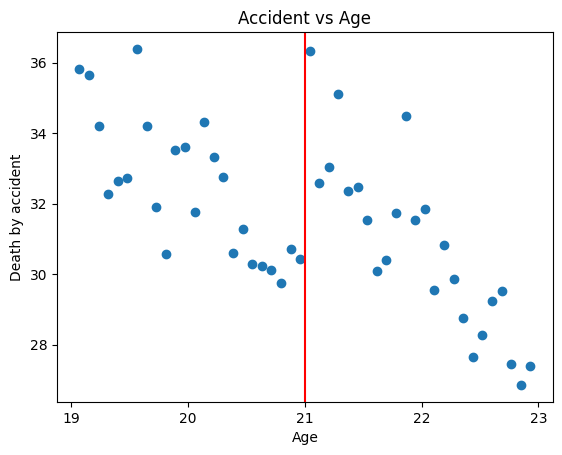

In [ ]:
### Accident vs Age
age_threshold = 21  # Set the age threshold
bandwidth = 1  # Set the bandwidth

# Create a scatter plot
plt.scatter(data['age'], data['accident'])
plt.axvline(x = age_threshold, color='red')

## set the bandwidth to be 1 year (i.e., 21 +- 1)
x_major_locator = MultipleLocator(bandwidth)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

# Set the plot title and axis labels
plt.title('Accident vs Age')
plt.xlabel('Age')
plt.ylabel('Death by accident')

plt.show()

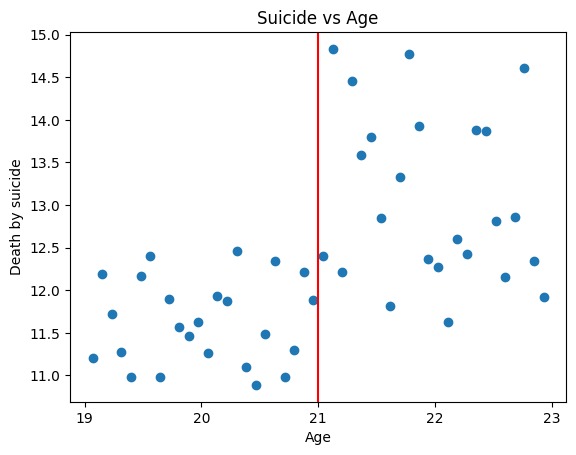

In [ ]:
### Suicide vs Age
age_threshold = 21  # Set the age threshold
bandwidth = 1  # Set the bandwidth

# Create a scatter plot
plt.scatter(data['age'], data['suicide'])
plt.axvline(x = age_threshold, color='red')

## set the bandwidth to be 1 year (i.e., 21 +- 1)
x_major_locator = MultipleLocator(bandwidth)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

# Set the plot title and axis labels
plt.title('Suicide vs Age')
plt.xlabel('Age')
plt.ylabel('Death by suicide')

plt.show()

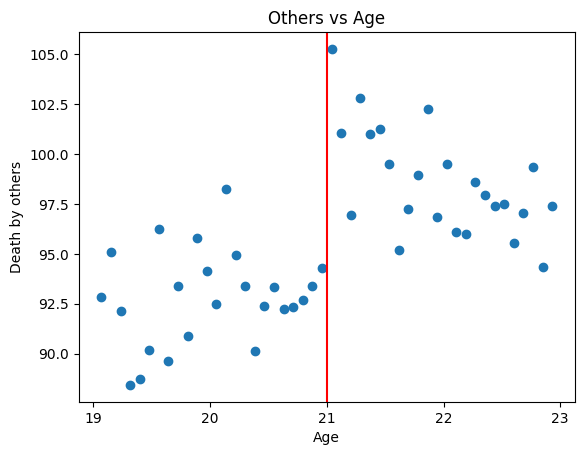

In [ ]:
### Others vs Age
age_threshold = 21  # Set the age threshold
bandwidth = 1  # Set the bandwidth

# Create a scatter plot
plt.scatter(data['age'], data['others'])
plt.axvline(x = age_threshold, color='red')

## set the bandwidth to be 1 year (i.e., 21 +- 1)
x_major_locator = MultipleLocator(bandwidth)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

# Set the plot title and axis labels
plt.title('Others vs Age')
plt.xlabel('Age')
plt.ylabel('Death by others')

plt.show()

 We can clearly see from all of the graphs above, right around the age of 21, within very short bandwidth, the chances of death increase very significantly by all 3 causes. This is a prime example of Regression discontinuity and how we can observe the treatment effect of drinking age, again very close to the age of 21 since we want to minimize the effect of other covariates that might also be increasing the chance of death

### What might be the effect of choosing a smaller bandwidth?  What if we chose the maximum bandwidth?
 In Regression discontinuity, we try to observe and measure the effeect of some treatment, drinking age in our case, on some variable of interest, chance of death in our case. When measuring treatment effect we want to choose the bandwith around the treshold as small as possible to minimize the effects of other covariates that might be affecting the variable of interest, and measure exactly the effect of treatment. If we increase bandwidth around the treshold we will also be increasing the effects of other covariates that might affect the variable of death, and decrease the accuracy of our measurement of treatment effec.

# Treatment Effects

Using hotel_cancellation.csv dataset, we will try to estimate the treatment effects if a ‘different room is assigned’ as the treatment indicator and interpret its effect on the room being ‘canceled’. We will use all the other columns as the covariates and write our observations for the results.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
HC = pd.read_csv("hotel_cancellation.csv")
print(HC)

HC['different_room_assigned_Yes'] = (HC['different_room_assigned'] == True).astype(int)
HC['Room_is_canceled'] = (HC['is_canceled'] == True ).astype(int)
HC = HC.dropna(subset = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list', 'different_room_assigned', 'is_canceled']).reset_index()

print(len(HC))
print(HC)

HC = HC[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list', 'different_room_assigned_Yes', 'Room_is_canceled']]
HC.head()

        Unnamed: 0  lead_time  arrival_date_year  arrival_date_week_number  \
0                3         13               2015                        27   
1                4         14               2015                        27   
2                5         14               2015                        27   
3                7          9               2015                        27   
4                8         85               2015                        27   
...            ...        ...                ...                       ...   
102889      119385         23               2017                        35   
102890      119386        102               2017                        35   
102891      119387         34               2017                        35   
102892      119388        109               2017                        35   
102893      119389        205               2017                        35   

        arrival_date_day_of_month  days_in_waiting_list  \
0   

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,days_in_waiting_list,different_room_assigned_Yes,Room_is_canceled
0,13,2015,27,1,0,0,0
1,14,2015,27,1,0,0,0
2,14,2015,27,1,0,0,0
3,9,2015,27,1,0,0,0
4,85,2015,27,1,0,0,1


In [ ]:
# Specify the response and treatment variables
y = HC['Room_is_canceled']
x = HC[['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'days_in_waiting_list', 'different_room_assigned_Yes']]

# Fit a logistic regression model
model = sm.Logit(y, x)
result = model.fit()
# Print the treatment effect estimates
result.summary()

Optimization terminated successfully.
         Current function value: 0.598443
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Room_is_canceled   No. Observations:               102894
Model:                          Logit   Df Residuals:                   102888
Method:                           MLE   Df Model:                            5
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.1053
Time:                        21:49:50   Log-Likelihood:                -61576.
converged:                       True   LL-Null:                       -68825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
lead_time                       0.0052   6.83e-05     76.109      0.000       0.005       0.005
arrival_date_year              -0.0004   1.01e-05    -37.173      0.000      -0.000      -0.000
arrival_date_week_number       -0.0042      0.001     -7.853      0.000      -0.005      -0.003
arrival_date_day_of_month      -0.0011      0.001     -1.471      0.141      -0.003       0.000
days_in_waiting_list            0.0013      0.000      3.336      0.001       0.001       0.002
different_room_assigned_Yes    -2.5186      0.044    -57.442      0.000      -2.604      -2.433
===============================================================================================
"""

### Interpretations
#### From the results of our logistic regression, we can say that assigning customer to a different room multiplies the odds of cancellation by exp(-2.518556).
#### Since the coefficient is a negative number, it actually decreases the odds of cancellation.
#### The ods of cancellation gets multiplied by 0.08 (exp(-2.518556)), compared to the customers that were not assigned to a different room.
#### That is kind of counterintiuitive but might be due to the fact that customers were getting assigned to better rooms. Who knows :)

#### When it comes to other covariates, all of them seem to have statistically significant effect on cancellation, except the arrival date of the month.
#### Most of the the significant variables also decrease the odds of cancellation, just like the treatment variable.(Interpretations hold the same for all variables.)
#### Only the lead time seems to increase the odds of cancellation, which is understandable, since  bookings with higher lead time tend to have higher cancellation chance.

## Double Lasso

Now, we will use double logistic regression to measure the effect of ‘different room is assigned’ on the room being ‘canceled’.

In [ ]:
model1 = sm.Logit(y, x).fit()
y_hat = np.array(model1.predict(x)).reshape(len(x), 1)
x_new = np.hstack((x, y_hat))
model2 = sm.Logit(y, x_new).fit()
print(model2.params)
model2.summary()

Optimization terminated successfully.
         Current function value: 0.598443
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598387
         Iterations 7
x1    0.003418
x2   -0.000613
x3   -0.002827
x4   -0.000734
x5    0.000942
x6   -1.981461
x7    1.493549
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Room_is_canceled   No. Observations:               102894
Model:                          Logit   Df Residuals:                   102887
Method:                           MLE   Df Model:                            6
Date:                Tue, 14 Feb 2023   Pseudo R-squ.:                  0.1054
Time:                        21:49:58   Log-Likelihood:                -61570.
converged:                       True   LL-Null:                       -68825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0034      0.001      6.449      0.000       0.002       0.004
x2            -0.0006   7.08e-05     -8.660      0.000      -0.001      -0.000
x3            -0.0028      0.001     -4.278      0.000      -0.004      -0.002
x4            -0.0007      0.001     -0.933      0.351      -0.002       0.001
x5             0.0009      0.000      2.276      0.023       0.000       0.002
x6            -1.9815      0.162    -12.218      0.000      -2.299      -1.664
x7             1.4935      0.440      3.393      0.001       0.631       2.356
==============================================================================
"""

#### Here, coefficient of x6 shows the treatment effect.

#### After running a double logistic regression, the effects of assigning customer to a different room weakens which is understandable. When we run a double logistic regression, we also make sure to consider the effects of treatment on the variable of interest, that is due to other covariates. After accounting for those effects, assigning customer to a different room mulplies the odds of cancellation by 0.13 (exp(-1.9815)). It still decreases the odds of cancellation, but the effect is weaker compared to what we found from normal logistic regression.

# Bootstrap
 Finally, we will use bootstrap to estimate the standard error of the treatment effects measured above

In [ ]:
# Define the number of bootstrap resamples
n_resamples = 1000

# Initialize a matrix to store the treatment effect estimates
treat_effects = np.zeros((n_resamples, model2.params.shape[0] - 1))

# Use bootstrapping to estimate the standard error of the treatment effects
i = 0
while i < n_resamples:
    resample_index = np.random.choice(HC.index, size = HC.index.size, replace = True)
    resample = HC.iloc[resample_index]
    x_resample = x.iloc[resample_index]
    y_resample = y.iloc[resample_index]
    model1 = sm.Logit(y_resample, x_resample).fit()
    y_hat = np.array(model1.predict(x_resample)).reshape(len(y_hat), 1)
    x_new = np.hstack((x_resample, y_hat))
    model2 = sm.Logit(y_resample, x_new).fit()
    treat_effects[i, :] = model2.params[:-1]
    i += 1

# Calculate the standard error of the treatment effects
treat_effects_se = treat_effects.std(axis=0)

# Print the standard errors of the treatment effect estimates
print('Standard errors of the treatment effects:')
print(treat_effects_se)

Optimization terminated successfully.
         Current function value: 0.600511
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.600458
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598643
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598551
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598730
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598687
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.598565
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.597911
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.597889
  

### As a result of bootstrapping we estimated the standard error of the treatment effect from double logistic regression to be 0.167. This is very close to what we got as a result of running normal double logistic regression which is 0.164